In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("IRIS (2).csv")

In [4]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data[["sepal_length","sepal_width","petal_length","petal_width"]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


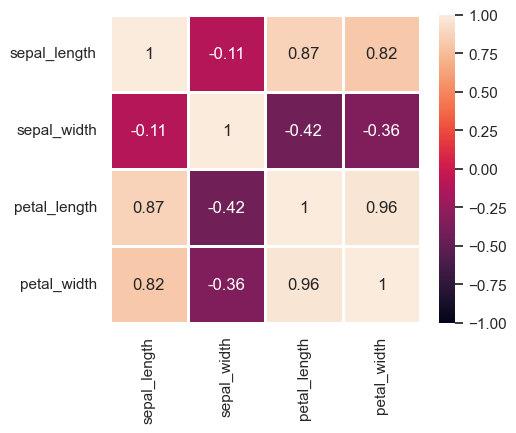

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(data[['sepal_length','sepal_width','petal_length','petal_width']].corr(),vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


<AxesSubplot:>

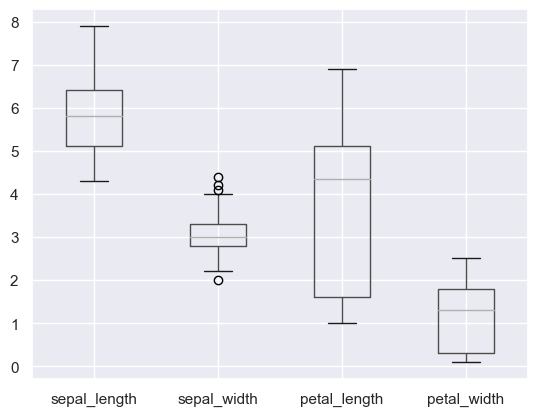

In [11]:
data.boxplot()

In [12]:
data['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [13]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
x=data.drop("species",axis=1)
y=data["species"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [16]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ',  x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ',  y_test.shape)

Shape of x_train:  (105, 4)
Shape of x_test:  (45, 4)
Shape of y_train:  (105,)
Shape of y_test:  (45,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

accuracy = dt.score(x_train, y_train) * 100
print("Training accuracy:", accuracy, "%")
accuracy1 = dt.score(x_test,y_test)* 100
print("Testing accuracy:", accuracy, "%")

Training accuracy: 100.0 %
Testing accuracy: 100.0 %


In [18]:
prediction = dt.predict(x_test)

In [19]:
cross = pd.DataFrame({'Actual' : y_test, 'Predicted': prediction})
cross

,Actual,Predicted
42,0,0
148,2,2
19,0,0
96,1,1
51,1,1
135,2,2
8,0,0
68,1,1
134,2,2
86,1,1


In [21]:
from sklearn.metrics import confusion_matrix
predict = dt.predict(x_test)
cm = confusion_matrix(y_test,prediction)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

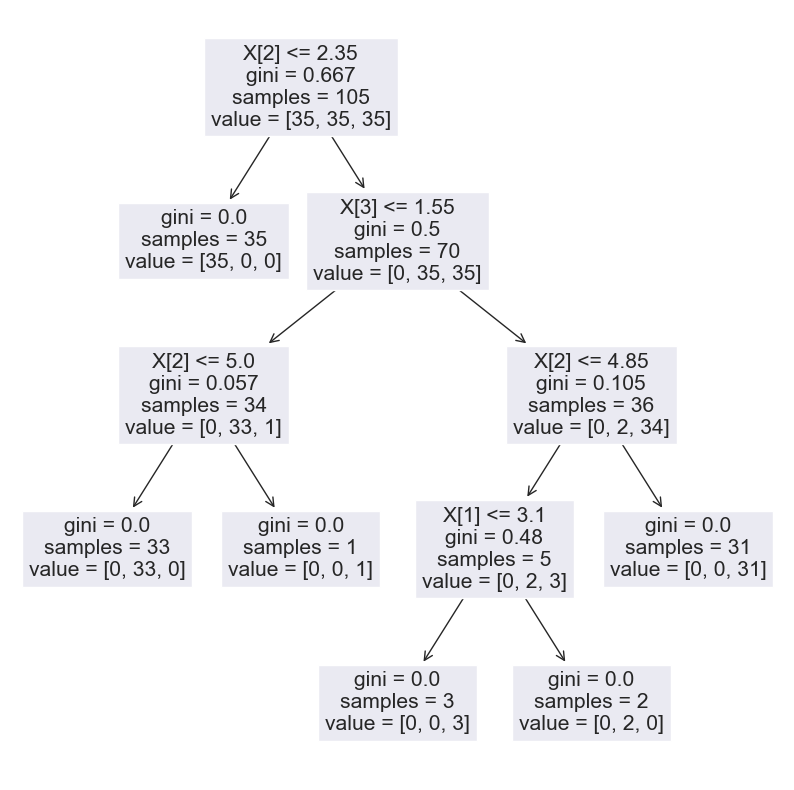

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()